## Deep Q Learning in PyTorch
### Phil Tabor - Udemy - Modern Reinforcement Learning: Deep Q Learning in PyTorch
------------------------------------------------
### Exercise 1: Frozen Lake, with a deterministic, fixed policy
**Observations:**
- With random policy the avg. score (win rate) is very low < 20%. 
- With this exercise i.e. deterministic policy (below) - avg. score is max 20%
- Many times score is zero i.e. falls in the Hole
- "Learning" should improve this win rate percentage

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

* Left = 0, Down = 1, Right = 2, Up = 3

```
 SFFF
 FHFH
 FFFH
 HFFG 
 ```

#### Policy = State + Action look up

One possible policy: 
- If in state=0, do this=1 i.e. down
- If in state=1, do this=2 i.e. right
- If in state=3, do this=0 i.e. ** LEFT ** - any other action is doom (up, right = wall = DONE and down = HOLE) 
- etc. etc.

Note - 'Hole' states i.e. 5, 7 etc. ARE NOT mentioned in dict. as we do NOT want to perform any action for that

In [2]:
# Dictinary to rep policy. Keys = States, Values = Actions
policy = {0: 1, 1: 2, 2: 1, 3: 0, 4: 1, 6: 1, 8: 2, 9: 1, 10: 1, 13: 2, 14: 2}

In [3]:
env = gym.make('FrozenLake-v1')

In [4]:
n_games = 1000
average_scores = []
scores = []

for n in range(n_games):
    done = False
    obs = env.reset()
    score = 0
    
    while not done:
        action = policy[obs]
        obs, reward, done, info = env.step(action)
        score += reward
        
    scores.append(score)
    
    # print average every 10 records
    if n % 10 == 0:
        average = np.mean(scores[-10:])
        average_scores.append(average)

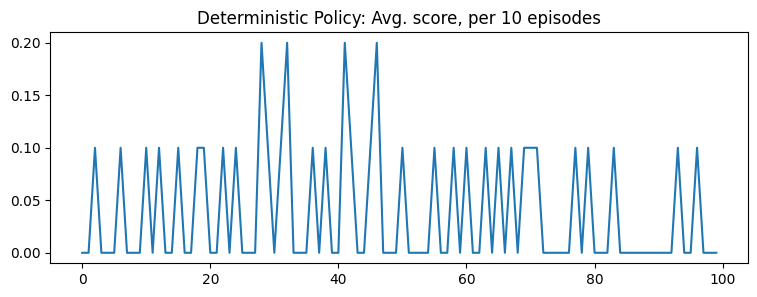

In [5]:
plt.figure(figsize=(9,3))
plt.plot(average_scores)
plt.title('Deterministic Policy: Avg. score, per 10 episodes')
plt.show()